In [77]:
from AnomalousCommunityDetection.BiPartiteConverter import BiPartiteConverter
#from AnomalousCommunityDetection.BiPartiteNetwork.WikipediaRevisionsGraphSimulator import WikipediaRevisionsGraphSimulator
from AnomalyInfusedCommunityStructuredRandomNetworkGenerator.AnomalyInfusedCommunityStructuredRandomNetworkGenerator1 import AnomalyInfusedCommunityStructuredRandomNetworkGenerator

In [78]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph, barabasi_albert_graph
import numpy as np
import random
import json

%matplotlib inline  

In [79]:
a = 42
nrs = np.random.RandomState(a)
rrs = random.seed(a)

In [47]:
random_seed = 1

In [48]:
norm_comm_alg = barabasi_albert_graph
anom_comm_alg = erdos_renyi_graph
p_inter = 0.5
k_min = 1
k_max = 1

In [80]:
normal_community_sizes = [3]*4
normal_m = 1

anomalous_community_sizes = [3]*1
anomalous_m = 1

In [81]:
simulator = AnomalyInfusedCommunityStructuredRandomNetworkGenerator(norm_comm_alg, anom_comm_alg, p_inter, k_min, k_max, random_seed)

In [85]:
G = simulator.generate_network(normal_community_sizes, normal_m, anomalous_community_sizes, anomalous_m)

In [84]:
G = simulator.generate_partition_graph(normal_community_sizes, normal_m, anomalous_community_sizes, anomalous_m)

AttributeError: 'AnomalyInfusedCommunityStructuredRandomNetworkGene' object has no attribute 'generate_partition_graph'

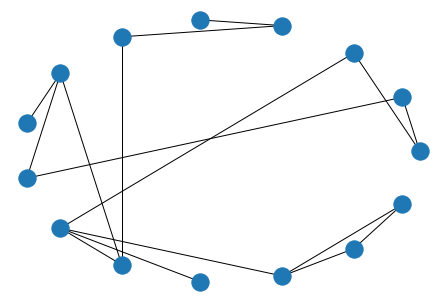

In [86]:
nx.draw_shell(G)

In [87]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

In [90]:
simulator.get_partitions()

{'comm01': ['1', '2', '3', '9'],
 'comm02': ['4', '5', '6'],
 'comm03': ['8', '9', '11', '7'],
 'comm04': ['3', '6', '10', '11', '12', '13'],
 'comm05': ['13', '14', '15']}

In [93]:
simulator._partitions

[{1, 2, 3}, {4, 5, 6}, {7, 8, 9}, {10, 11, 12}, {13, 14, 15}]

In [92]:
simulator._updated_partitions

[{1, 2, 3, 9}, {4, 5, 6}, {7, 8, 9, 11}, {3, 6, 10, 11, 12, 13}, {13, 14, 15}]

In [94]:
parts = simulator.get_partitions()
parts

{'comm01': ['1', '2', '3', '9'],
 'comm02': ['4', '5', '6'],
 'comm03': ['8', '9', '11', '7'],
 'comm04': ['3', '6', '10', '11', '12', '13'],
 'comm05': ['13', '14', '15']}

In [95]:
simulator.save_partitions('shit.json')

In [96]:
with open('shit.json', 'r') as file:
    user_dict = json.load(file)

In [97]:
user_dict

{'comm01': ['1', '2', '3', '9'],
 'comm02': ['4', '5', '6'],
 'comm03': ['8', '9', '11', '7'],
 'comm04': ['3', '6', '10', '11', '12', '13'],
 'comm05': ['13', '14', '15']}

In [98]:
user_dict['comm01']

['1', '2', '3', '9']

## Check BiPartiteConverter against old graph generator to bipartite method

In [100]:
BPG1 = simulator._graph_to_bipartite('comm', 'user')

AttributeError: 'AnomalyInfusedCommunityStructuredRandomNetworkGene' object has no attribute '_graph_to_bipartite'

In [101]:
convertor = BiPartiteConverter('shit.json')

In [102]:
BPG2 = convertor.generate_bipartite_graph(['comm01', 'comm02', 'comm03', 'comm04', 'comm05'], )

In [103]:
BPG1.edges

EdgeView([('comm1', 1), ('comm1', 2), ('comm1', 3), ('comm1', 5), ('comm1', 8), ('comm1', 14), ('comm2', 13), ('comm2', 4), ('comm2', 5), ('comm2', 6), ('comm3', 8), ('comm3', 9), ('comm3', 3), ('comm3', 7), ('comm4', 10), ('comm4', 11), ('comm4', 12), ('comm4', 13), ('comm4', 14)])

In [104]:
BPG2.edges

EdgeView([('comm01', '1'), ('comm01', '2'), ('comm01', '3'), ('comm01', '9'), ('comm02', '4'), ('comm02', '5'), ('comm02', '6'), ('comm03', '8'), ('comm03', '9'), ('comm03', '11'), ('comm03', '7'), ('comm04', '3'), ('comm04', '6'), ('comm04', '10'), ('comm04', '11'), ('comm04', '12'), ('comm04', '13'), ('comm05', '13'), ('comm05', '14'), ('comm05', '15')])

In [105]:
BPG1.nodes

NodeView(('comm1', 'comm2', 'comm3', 'comm4', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [106]:
BPG2.nodes

NodeView(('comm01', 'comm02', 'comm03', 'comm04', 'comm05', '11', '7', '4', '3', '13', '9', '5', '1', '8', '10', '15', '2', '14', '12', '6'))

In [75]:
BPG1.nodes == BPG2.nodes

False

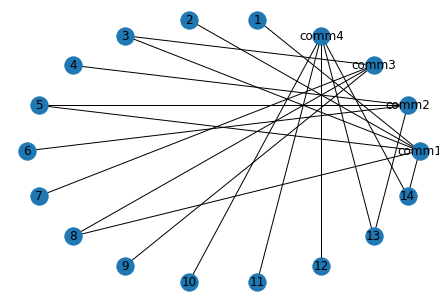

In [69]:
nx.draw_shell(BPG1, with_labels=True)

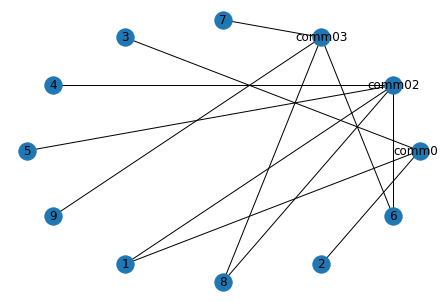

In [31]:
nx.draw_shell(BPG2, with_labels=True)

## Check BiPartiteConverter against WikipediaRevisionsGraphSimulator

In [118]:
WIKIPEDIA_PAGE_USER_DICT_PATH = 'E:\\Datasets\\WikipediaHE\\ProcessedData\\PageUserDict_2018-01-01_2019-01-01.json'

TRAIN_SET_COMMS_PATH = 'HeWikiTrainSetCats.json'

In [120]:
with open(TRAIN_SET_COMMS_PATH, 'r') as file:
    train_cats = list(json.load(file).keys())

In [122]:
len(train_cats)

100

In [164]:
train_cats = {k for i,k in enumerate(train_cats) if i< 3}

In [165]:
train_cats


{'SpaceIL', 'אגם_בוחבוט', 'אור_טרגן'}

In [176]:
train_cats = {'אור_טרגן'}

In [177]:
wikisim = WikipediaRevisionsGraphSimulator(WIKIPEDIA_PAGE_USER_DICT_PATH)
convertor = BiPartiteConverter(WIKIPEDIA_PAGE_USER_DICT_PATH)

In [178]:
WikiG1 = wikisim.generate_bi_partite_graph(train_cats)

In [179]:
WikiG2 = convertor.generate_bipartite_graph(train_cats)

In [180]:
len(WikiG1.nodes)

28

In [181]:
len(WikiG2.nodes)

28

In [182]:
np.array([n1 == n2 for n1, n2 in zip(WikiG1.nodes, WikiG2.nodes)]).sum()

28

In [183]:
len(WikiG1.edges)

27

In [184]:
len(WikiG2.edges)

27

In [185]:
np.array([n1 == n2 for n1, n2 in zip(WikiG1.edges, WikiG2.edges)]).sum()

27

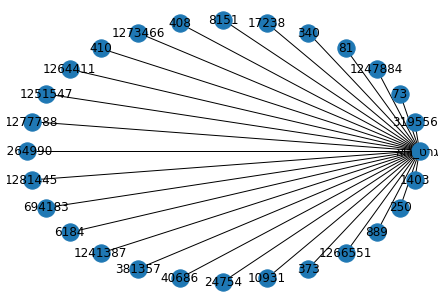

In [186]:
nx.draw_shell(WikiG1, with_labels=True)

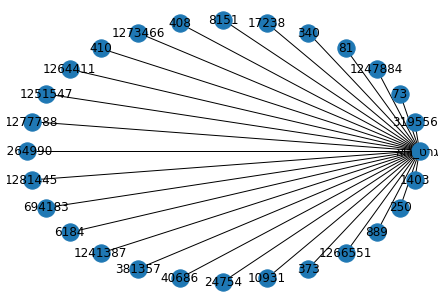

In [187]:
nx.draw_shell(WikiG2, with_labels=True)